In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [0]:
data = pd.read_csv("air_bnb.csv")

In [168]:
data = pd.DataFrame(data, columns =['id','host_id','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])
data.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,2217,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,3.76,4,141
1,2695,2986,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,1.42,1,0
2,3176,3718,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,1.25,1,220
3,3309,4108,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,0.39,1,297
4,7071,17391,Pankow,Helmholtzplatz,Private room,42,2,197,1.75,1,26


#Mengatasi Missing Value

In [169]:
data.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


#Korelasi Antar Data

In [0]:
import seaborn as sns
sns.set_style("whitegrid")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

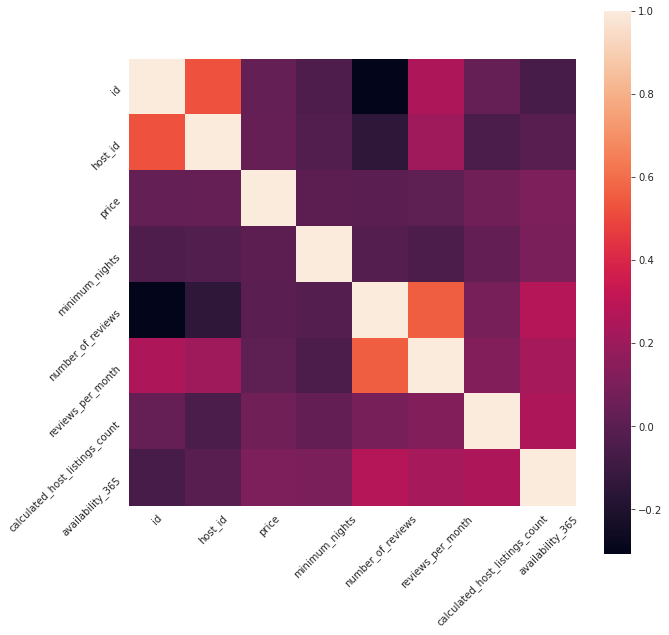

In [171]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
#ax.set_xtickLabels(rotation=30)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [172]:
data.groupby("neighbourhood_group").count()

,id,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Charlottenburg-Wilm.,1592,1592,1592,1592,1592,1592,1592,1284,1592,1592
Friedrichshain-Kreuzberg,5497,5497,5497,5497,5497,5497,5497,4601,5497,5497
Lichtenberg,688,688,688,688,688,688,688,530,688,688
Marzahn - Hellersdorf,141,141,141,141,141,141,141,114,141,141
Mitte,4631,4631,4631,4631,4631,4631,4631,3831,4631,4631
Neukölln,3499,3499,3499,3499,3499,3499,3499,2915,3499,3499
Pankow,3541,3541,3541,3541,3541,3541,3541,2956,3541,3541
Reinickendorf,247,247,247,247,247,247,247,200,247,247
Spandau,124,124,124,124,124,124,124,94,124,124


In [173]:
corr

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.527680,0.030992,-0.041777,-0.308877,0.250475,0.038248,-0.059485
host_id,0.527680,1.000000,0.037808,-0.028396,-0.148577,0.203368,-0.048570,-0.009365
price,0.030992,0.037808,1.000000,0.003626,-0.001235,0.010060,0.073244,0.105959
minimum_nights,-0.041777,-0.028396,0.003626,1.000000,-0.021685,-0.047410,0.027285,0.099350
number_of_reviews,-0.308877,-0.148577,-0.001235,-0.021685,1.000000,0.556738,0.085898,0.277621
reviews_per_month,0.250475,0.203368,0.010060,-0.047410,0.556738,1.000000,0.121327,0.232556
calculated_host_listings_count,0.038248,-0.048570,0.073244,0.027285,0.085898,0.121327,1.000000,0.252414
availability_365,-0.059485,-0.009365,0.105959,0.099350,0.277621,0.232556,0.252414,1.000000


#Pemotongan Data

Untuk Classification

In [174]:
DataClas = pd.DataFrame(data, columns =['price','number_of_reviews','availability_365'])
DataClas.head()

,price,number_of_reviews,availability_365
0,60,118,141
1,17,6,0
2,90,143,220
3,26,25,297
4,42,197,26


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

In [176]:
DataClasNew = np.array(DataClas)
DataClasNew

array([[ 60, 118, 141],
       [ 17,   6,   0],
       [ 90, 143, 220],
       ...,
       [ 85,   0,  15],
       [ 99,   0,   6],
       [ 45,   0,  21]])

In [177]:
DataTrainClas = pd.DataFrame(data, columns =['number_of_reviews','availability_365'])
DataTrainClas.head()

,number_of_reviews,availability_365
0,118,141
1,6,0
2,143,220
3,25,297
4,197,26


In [178]:
DataTrainClasNew = np.array(DataTrainClas)
DataTrainClasNew

array([[118, 141],
       [  6,   0],
       [143, 220],
       ...,
       [  0,  15],
       [  0,   6],
       [  0,  21]])

In [179]:
DataTestClas = pd.DataFrame(data, columns =['price'])
DataTestClas.head()

,price
0,60
1,17
2,90
3,26
4,42


In [216]:
DataTestClasNew = np.array(DataTestClas)
DataTestClasNew = DataTestClasNew[:,0]
print(DataTestClasNew)

[60 17 90 ... 85 99 45]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(DataTrainClasNew, DataTestClasNew, test_size=0.5, random_state=45)

In [182]:
X_train

array([[  6,  66],
       [  2,   0],
       [  7,   0],
       ...,
       [ 17,  46],
       [  0,   0],
       [  6, 121]])

In [183]:
y_train

array([30, 25, 89, ..., 59, 45, 45])

simpan dataset classification

In [0]:
DataClas.to_csv("DatasetClassificition.csv", index=False)

Untuk Clustering

In [185]:
DataClus = pd.DataFrame(data, columns =['number_of_reviews','availability_365'])
DataClus.head()

,number_of_reviews,availability_365
0,118,141
1,6,0
2,143,220
3,25,297
4,197,26


simpan dataset clusterring

In [0]:
DataClus.to_csv("DatasetClusterring.csv", index=False)

#CLUSTERING

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [188]:
dataclustering = pd.read_csv("DatasetClusterring.csv")
dataclustering.head()

,number_of_reviews,availability_365
0,118,141
1,6,0
2,143,220
3,25,297
4,197,26


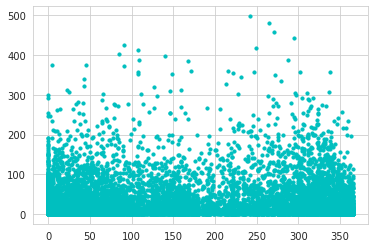

In [190]:
plt.scatter (dataclustering.availability_365, dataclustering.number_of_reviews, s = 10, c = "c", marker = "o", alpha = 1)
plt.show()

In [192]:
dataclusteringx = dataclustering.iloc[:, 0:2]
dataclusteringx.head()

,number_of_reviews,availability_365
0,118,141
1,6,0
2,143,220
3,25,297
4,197,26


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   host_id                         22552 non-null  int64  
 2   neighbourhood_group             22552 non-null  object 
 3   neighbourhood                   22552 non-null  object 
 4   room_type                       22552 non-null  object 
 5   price                           22552 non-null  int64  
 6   minimum_nights                  22552 non-null  int64  
 7   number_of_reviews               22552 non-null  int64  
 8   reviews_per_month               18638 non-null  float64
 9   calculated_host_listings_count  22552 non-null  int64  
 10  availability_365                22552 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 1.9+ MB


In [194]:
x_array = np.array(dataclustering)
print(x_array)

[[118 141]
 [  6   0]
 [143 220]
 ...
 [  0  15]
 [  0   6]
 [  0  21]]


In [195]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.23694779, 0.38630137],
       [0.01204819, 0.        ],
       [0.28714859, 0.60273973],
       ...,
       [0.        , 0.04109589],
       [0.        , 0.01643836],
       [0.        , 0.05753425]])

In [0]:
kmeans = KMeans(n_clusters = 5, random_state=123)

In [197]:
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [198]:
print(kmeans.cluster_centers_)

[[0.01669417 0.01139172]
 [0.04794507 0.51669326]
 [0.04488982 0.88601483]
 [0.0643475  0.21763222]
 [0.36881342 0.7602078 ]]


In [0]:
dataclustering["kluster"] = kmeans.labels_

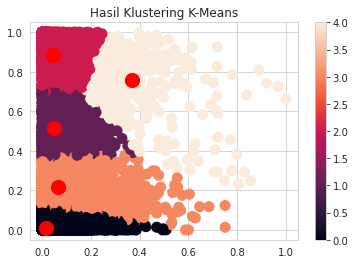

In [203]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = dataclustering.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

#CLUSTERING 2

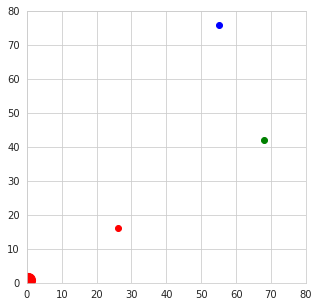

In [211]:
## Initialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(dataclustering)

np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o")
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [212]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

KeyError: ignored

#CLASSIFICATION

In [0]:
print(Dclas.groupby('price').size())

In [0]:
Dclas.drop('price', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Plot variabel input')
plt.savefig('')
plt.show()

In [0]:
import pylab as pl
DataClas.drop('price' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram untuk input numeric variabel")
plt.savefig('')
plt.show()

In [0]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['availability_365','number_of_reviews']
X = DataClas[feature_names]
y = DataClas['price']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [0]:
DataClas.describe()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

In [0]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = DataClas[['mass', 'width', 'height', 'color_score']]
y = DataClas['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
plt.title("4-Class classification (k = %i, weights = '%s'% (n_neighbors, weights))")  
plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')